### *Introduction*

1.   Telco Customer Churn - Data Cleaning and Analysis
2.  Source: https://www.kaggle.com/blastchar/telco-customer-churn
3. Author: Abdullah Gaballah



## 1. Load Data

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"abdallahgaballah","key":"ca0e95bdbbe9df43ddc6bb8ea61b4835"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d blastchar/telco-customer-churn

Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
telco-customer-churn.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip telco-customer-churn.zip

Archive:  telco-customer-churn.zip
replace WA_Fn-UseC_-Telco-Customer-Churn.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


In [ ]:
import pandas as pd
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

## 2. Initial Exploration

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 3. Data Cleaning

In [ ]:
## 3.1 Convert columns to correct types


df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df['SeniorCitizen'] = df['SeniorCitizen'].map({1: True, 0: False})

In [ ]:
## 3.2 Handle missing values
df = df.dropna(subset=['TotalCharges'])


In [ ]:
## 3.3 Fix boolean-like columns

# Convert Yes/No columns to True/False
bool_cols = [
    'Partner', 'Dependents', 'PhoneService',
    'PaperlessBilling', 'Churn'
]
for col in bool_cols:
    df[col] = df[col].map({'Yes': True, 'No': False})

In [ ]:
## 3.4 Clean categorical service columns

# Columns with values like 'Yes', 'No', 'No internet service'
service_cols = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Replace 'No internet service' with 'No' (i.e., no service = No)
df[service_cols] = df[service_cols].replace({'No internet service': 'No', 'No phone service': 'No'})

# Convert to boolean
for col in service_cols:
    df[col] = df[col].map({'Yes': True, 'No': False})

# Convert categorical string columns to 'category' dtype
cat_cols = [
    'gender', 'InternetService', 'Contract', 'PaymentMethod'
]
for col in cat_cols:
    df[col] = df[col].astype('category')

In [ ]:
## 3.4 Normalize 'No internet service' and 'No phone service' values
no_service_cols = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'MultipleLines'
]

# Replace 'No internet service' and 'No phone service' with 'No'
for col in no_service_cols:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})

# Convert Yes/No columns to boolean
for col in no_service_cols:
    df[col] = df[col].map({'Yes': True, 'No': False})

## 4. Exploratory Data Analysis (EDA)

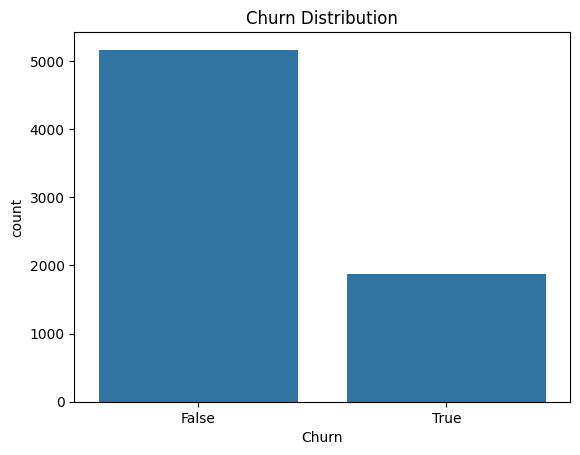

Churn Rate: 26.58%


In [ ]:
# Overview of Churn Distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

churn_rate = df['Churn'].mean()
print(f"Churn Rate: {churn_rate:.2%}")

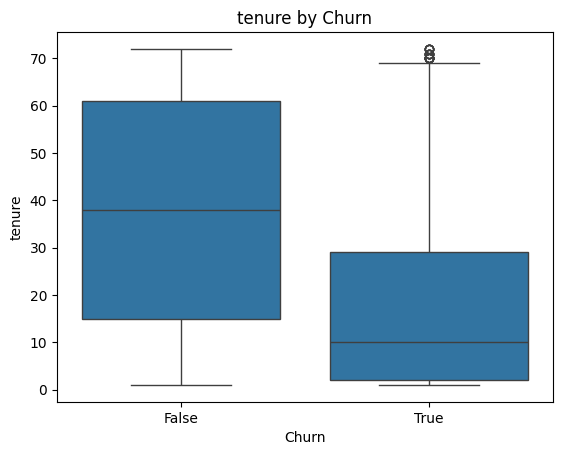

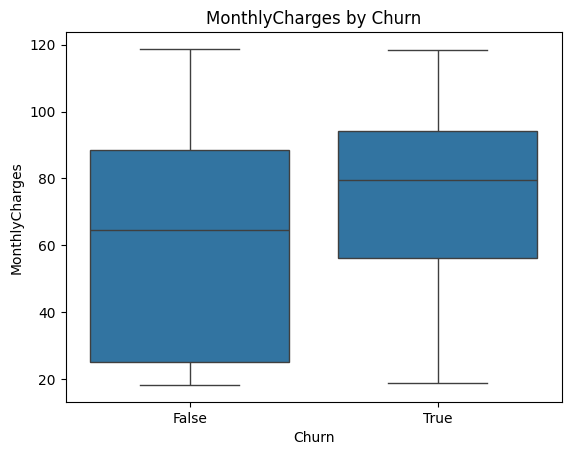

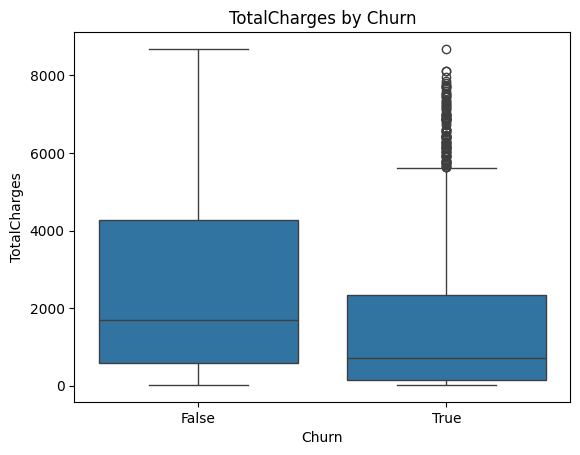

In [ ]:
#Compare numerical features by churn
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numerical_cols:
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} by Churn')
    plt.show()


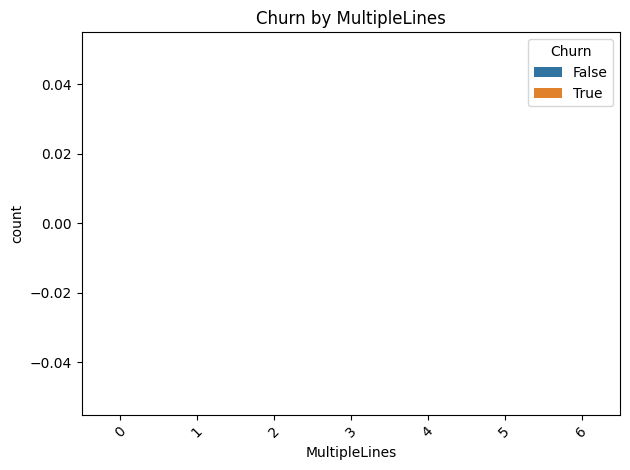

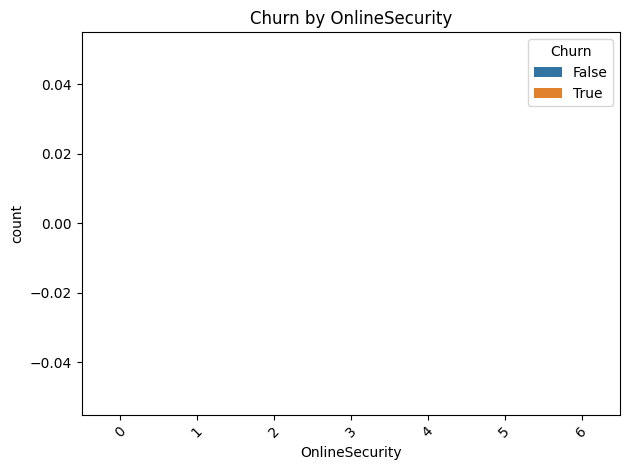

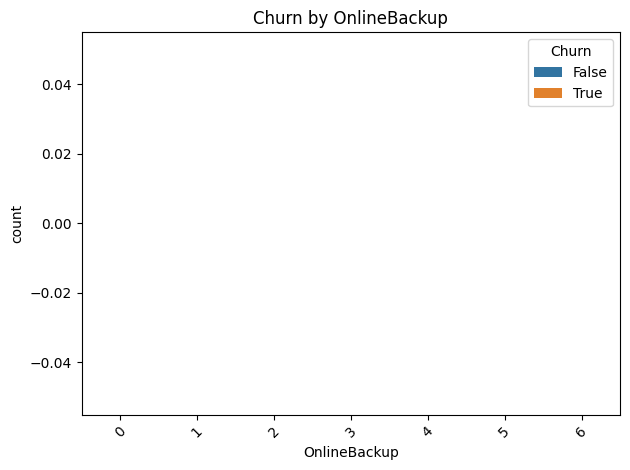

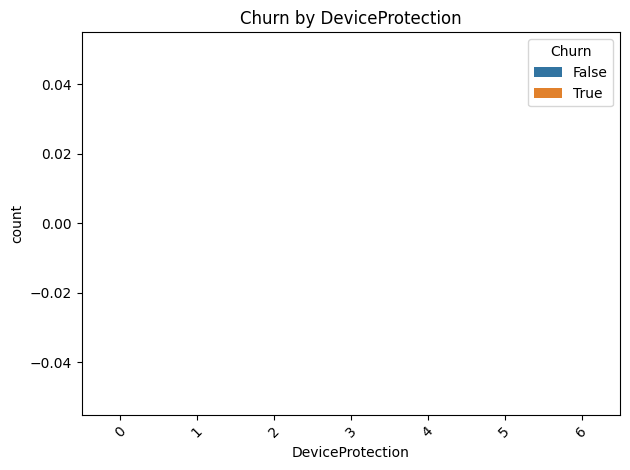

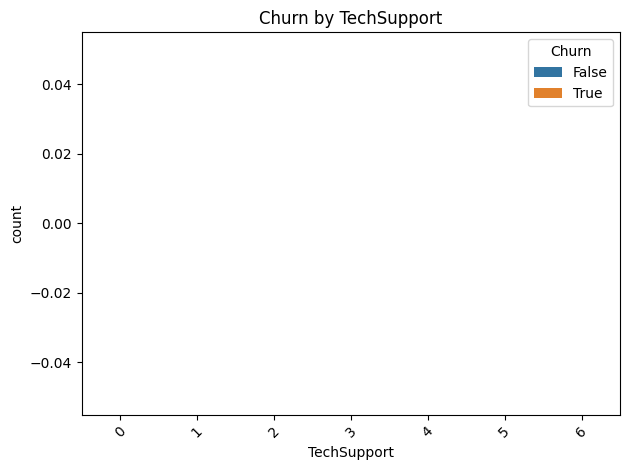

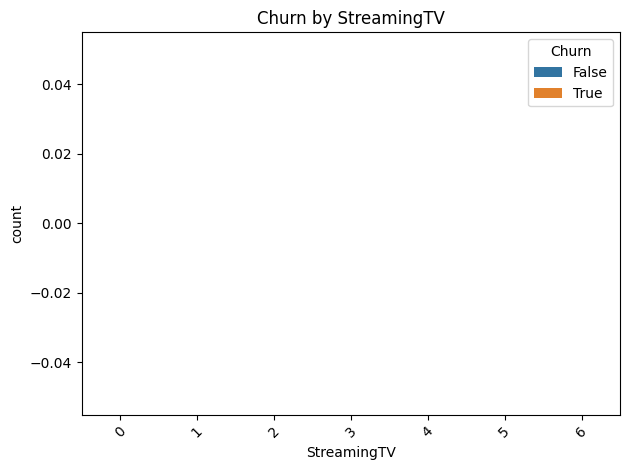

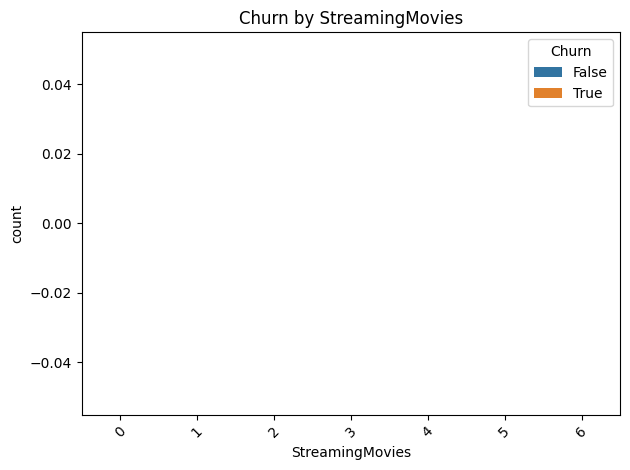

In [ ]:
#Compare categorical features by churn
cat_cols = df.select_dtypes(include='object').columns.tolist()

cat_cols = [col for col in cat_cols if col != 'customerID']

for col in cat_cols:
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'Churn by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
df_corr = df.copy()

df_corr['Churn'] = df_corr['Churn'].astype(int)

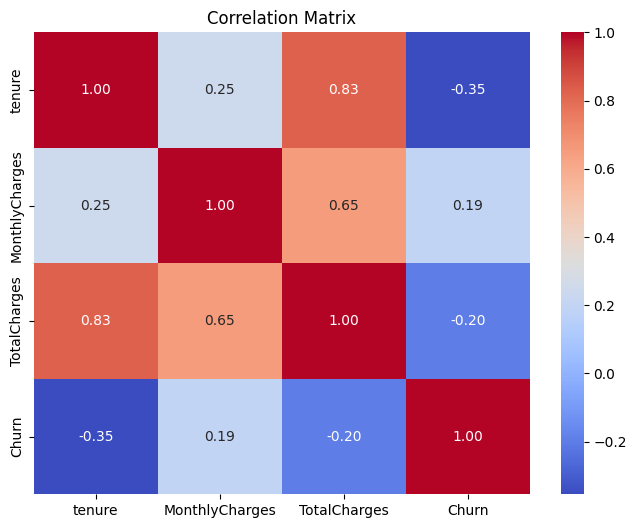

In [ ]:
num_df = df_corr.select_dtypes(include=['int64', 'float64'])

corr_matrix = num_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
churn_corr = corr_matrix['Churn'].sort_values(ascending=False)
print(churn_corr)

Churn             1.000000
MonthlyCharges    0.192858
TotalCharges     -0.199484
tenure           -0.354049
Name: Churn, dtype: float64


/tmp/ipython-input-51-2460081711.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='viridis')


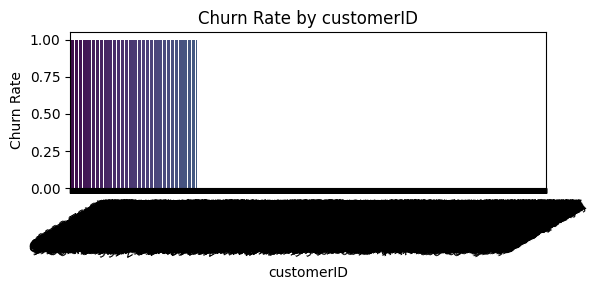

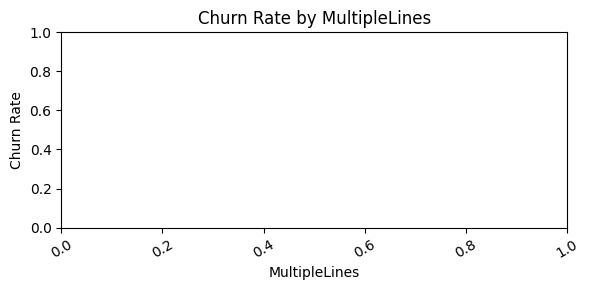

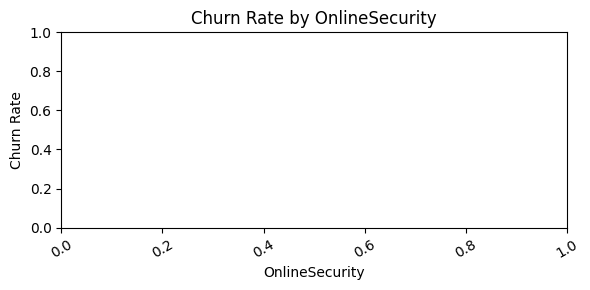

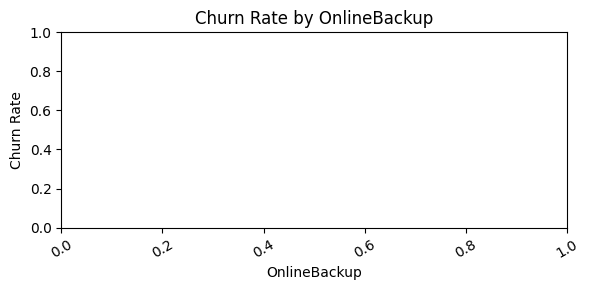

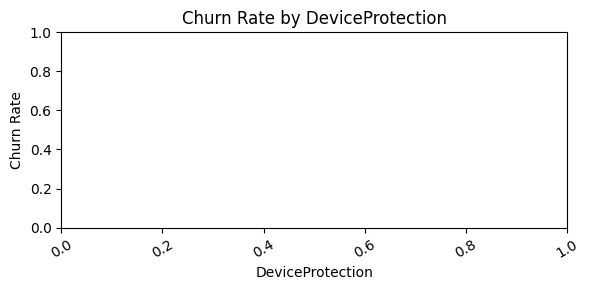

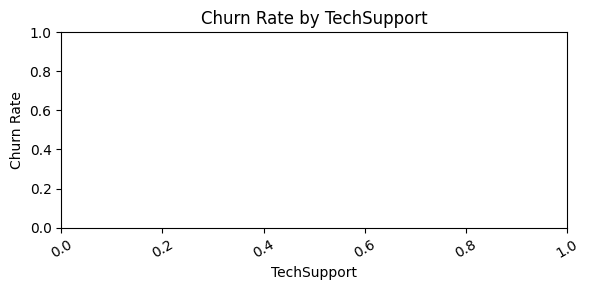

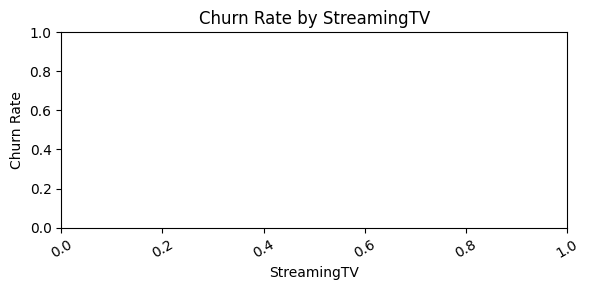

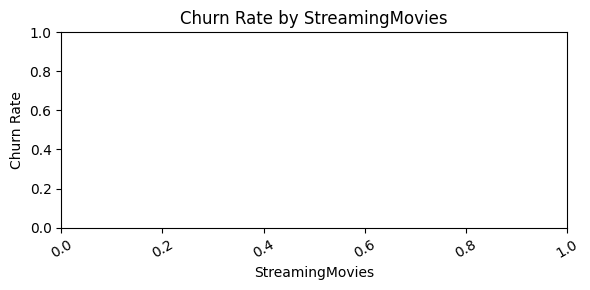

/tmp/ipython-input-51-2460081711.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='viridis')


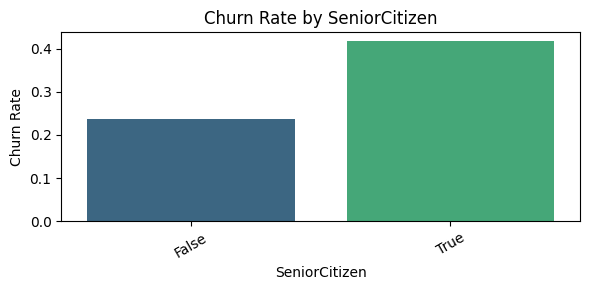

/tmp/ipython-input-51-2460081711.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='viridis')


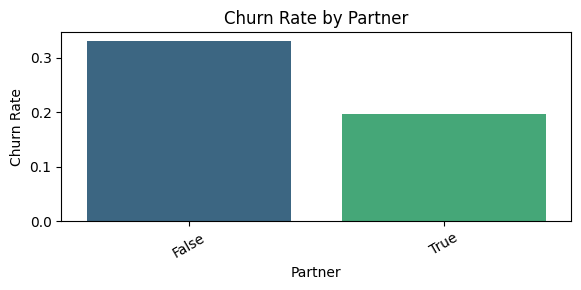

/tmp/ipython-input-51-2460081711.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='viridis')


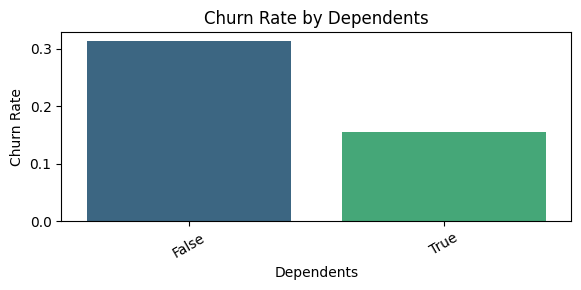

/tmp/ipython-input-51-2460081711.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='viridis')


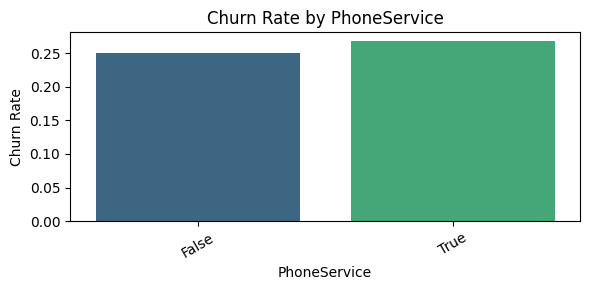

/tmp/ipython-input-51-2460081711.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='viridis')


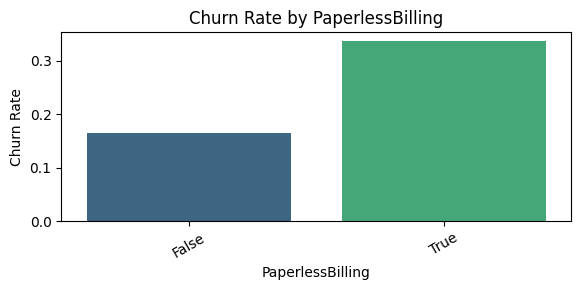

In [ ]:
#Visualizing churn rate per category
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols += df.select_dtypes(include='bool').columns.tolist()
cat_cols.remove('Churn')  # remove target

# Plot churn rate for each categorical feature
for col in cat_cols:
    plt.figure(figsize=(6, 3))
    churn_rate = df.groupby(col)['Churn'].mean().sort_values(ascending=False)
    sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='viridis')
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Rate')
    plt.xlabel(col)
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

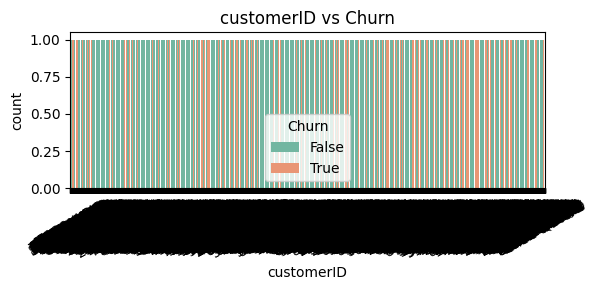

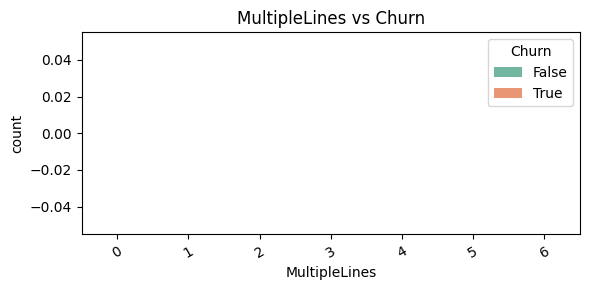

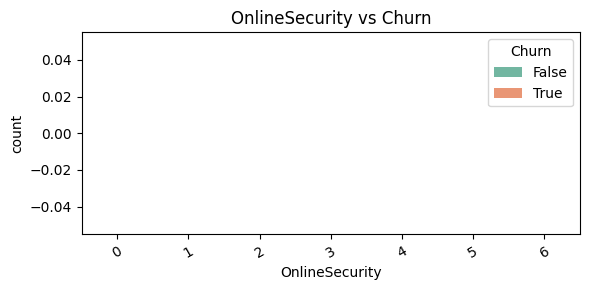

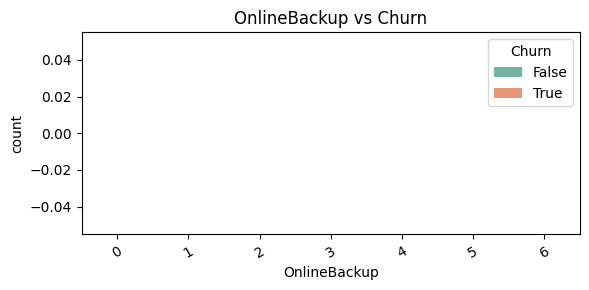

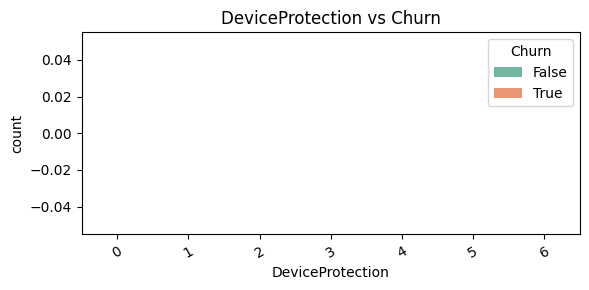

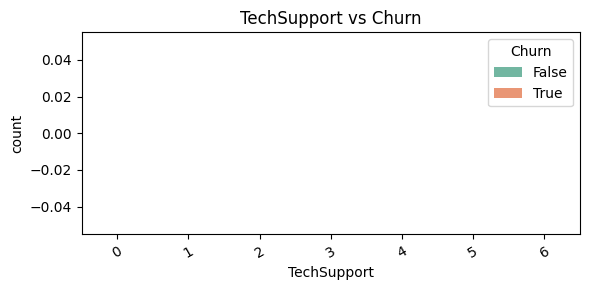

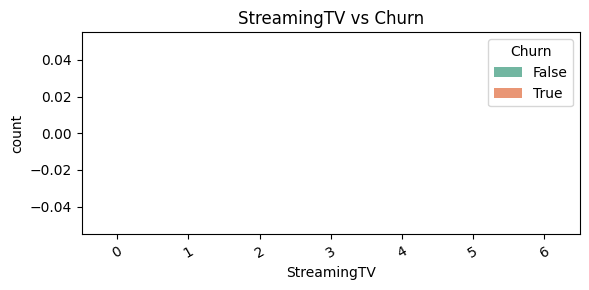

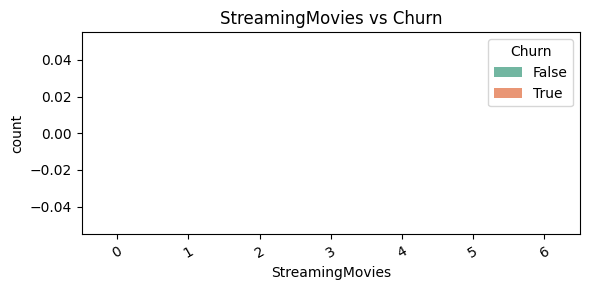

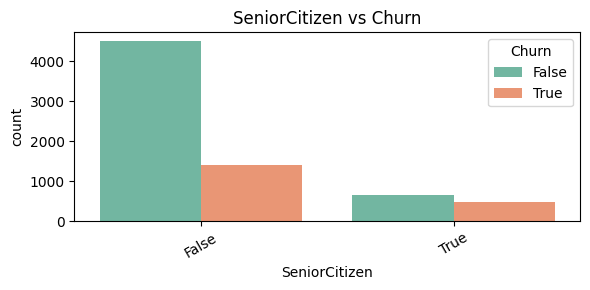

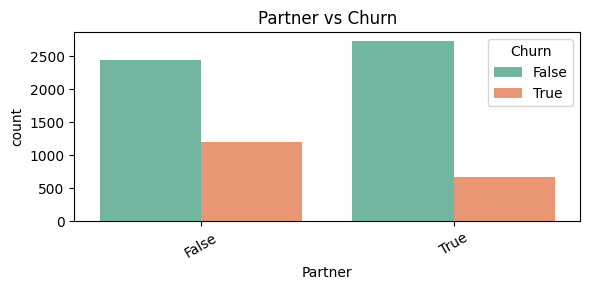

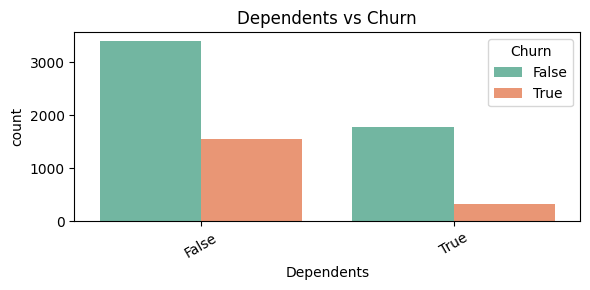

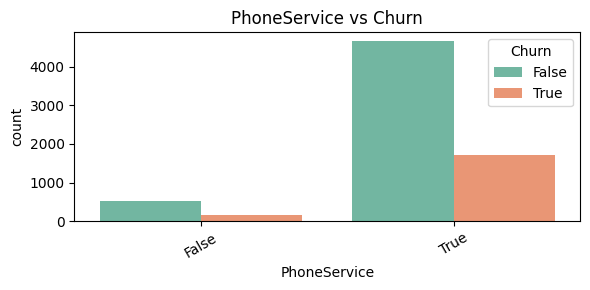

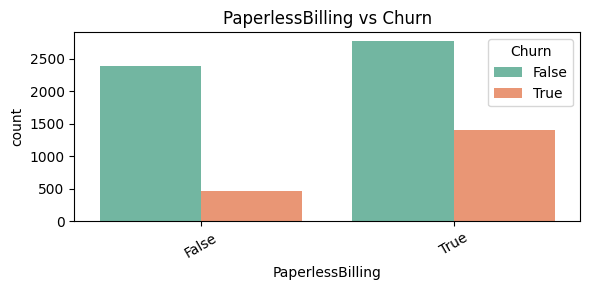

In [ ]:
#Count plots to show total vs churned customers per category
for col in cat_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(data=df, x=col, hue='Churn', palette='Set2')
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

## 5. Feature Engineering

In [ ]:
#Create TotalServices Feature
service_cols = [
    'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]


df[service_cols] = df[service_cols].replace({'No internet service': 'No', 'No phone service': 'No'})


for col in service_cols:
    df[col] = df[col].map({'Yes': True, 'No': False})


df['TotalServices'] = df[service_cols].sum(axis=1)


/tmp/ipython-input-53-1735024834.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[service_cols] = df[service_cols].replace({'No internet service': 'No', 'No phone service': 'No'})


In [ ]:
# Create HasInternetService and HasPhoneService Flag
df['HasInternetService'] = df['InternetService'] != 'No'
df['HasPhoneService'] = df['PhoneService'] != 'No'

In [ ]:
#Create TenureGroup for grouping customers
def tenure_group(tenure):
    if tenure <= 12:
        return '0–1 year'
    elif tenure <= 24:
        return '1–2 years'
    elif tenure <= 48:
        return '2–4 years'
    elif tenure <= 60:
        return '4–5 years'
    else:
        return '5–6 years'

df['TenureGroup'] = df['tenure'].apply(tenure_group)

In [ ]:
# Convert remaining categorical columns to category dtype
cat_cols_final = df.select_dtypes(include='object').columns
for col in cat_cols_final:
    df[col] = df[col].astype('category')

## 6. summary

In [ ]:
import os

os.makedirs('./reports', exist_ok=True)

# create the summary file
summary_path = './reports/summary.txt'

with open(summary_path, 'w') as f:
    f.write("Telco Customer Churn Dataset - Summary Report\n")
    f.write("=============================================\n\n")

    # Basic info
    f.write(f"Number of records: {len(df)}\n")
    f.write(f"Number of features: {len(df.columns)}\n\n")

    # Data types info
    f.write("Data Types:\n")
    f.write(str(df.dtypes))
    f.write("\n\n")

    # TenureGroup distribution
    f.write("TenureGroup Distribution:\n")
    tenure_counts = df['TenureGroup'].value_counts()
    for group, count in tenure_counts.items():
        f.write(f"  {group}: {count}\n")
    f.write("\n")

    # HasInternetService flag distribution
    f.write("HasInternetService Flag Distribution:\n")
    internet_counts = df['HasInternetService'].value_counts()
    for val, count in internet_counts.items():
        f.write(f"  {val}: {count}\n")
    f.write("\n")

    # HasPhoneService flag distribution
    f.write("HasPhoneService Flag Distribution:\n")
    phone_counts = df['HasPhoneService'].value_counts()
    for val, count in phone_counts.items():
        f.write(f"  {val}: {count}\n")
    f.write("\n")

    # Example: Churn rate
    churn_rate = df['Churn'].mean()
    f.write(f"Overall Churn Rate: {churn_rate:.2%}\n")